## Ford GoBike System Data Exploration

### By (Ogunseye Ibukunoluwa)

### Introduction

#### This document explores a dataset containing information about individual rides made in a bike-sharing system covering the greater San Francisco Bay Area in 2019

### Preliminary Wrangling

In [1]:
# importing all packages

import datetime as dt
import numpy as np
import pandas as pd
import csv
from bs4 import BeautifulSoup
import seaborn as sns
sns.set_style("darkgrid")
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.patches import Patch
plt.style.use('fivethirtyeight')

### Gather

In [2]:
#loading the dataset
Data = pd.read_csv('C:/Users/gameon/Downloads/201902-fordgobike-tripdata.csv')

### Assess

In [3]:
# Visual Assessment
Data.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [4]:
# Programmatic Assessment
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [5]:
Data.shape

(183412, 16)

In [6]:
Data.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [7]:
# Checking for missing data
Data.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [8]:
#Checking for duplicates
Data.duplicated().sum()

0

In [9]:
#Assessing the datatypes
Data.dtypes

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object

In [10]:
#Assessing the consistency of the data and possible outliers
Data['duration_sec'].sort_values(ascending=False)

101361    85444
85465     84548
153705    83772
127999    83519
112435    83407
          ...  
44301        61
44787        61
103565       61
157305       61
169882       61
Name: duration_sec, Length: 183412, dtype: int64

In [11]:
Data['user_type'].value_counts()

Subscriber    163544
Customer       19868
Name: user_type, dtype: int64

### Quality

#### 1. Some datatypes are not accurate especially for the datetime datatypes and the bike_id datatype
#### 2. There are missing values in the dataset especially for member_birth_year and member_gender which are essential to my visualization task.

### Tidiness
#### 1. Columns such as start_station and end_station IDs are not needed as well as the latitudes and longitudes and rows of missing data.

### Clean

In [12]:
# Making copy of the dataset

Data_Clean = Data.copy()

### Define

#### Change the datatypes of start_time, end_time, bike_id, user_type, member_gender, bike_share_for_all_trip

### Code

In [13]:
# Changing the datatypes

Data_Clean.start_time = pd.to_datetime(Data_Clean.start_time)
Data_Clean.end_time = pd.to_datetime(Data_Clean.end_time)
Data_Clean.bike_id = Data_Clean.bike_id.astype('str')
Data_Clean.user_type = Data_Clean.user_type.astype('category')
Data_Clean.member_gender = Data_Clean.member_gender.astype('category')
Data_Clean.bike_share_for_all_trip = Data_Clean.bike_share_for_all_trip.astype('category')

### Test

In [14]:
Data_Clean.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                  float64
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                    float64
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                            object
user_type                        category
member_birth_year                 float64
member_gender                    category
bike_share_for_all_trip          category
dtype: object

### Define

#### drop columns that are not needed as well as rows of missing data

### Code

In [15]:
# Dropping rows of missing data

Data_Clean = Data_Clean.dropna()

# Dropping columns

Data_Clean.drop(['start_station_id', 'end_station_id','start_station_latitude', 'start_station_longitude', 'end_station_latitude', 'end_station_longitude'], axis=1, inplace=True)

### Test

In [16]:
Data_Clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 10 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_name       174952 non-null  object        
 4   end_station_name         174952 non-null  object        
 5   bike_id                  174952 non-null  object        
 6   user_type                174952 non-null  category      
 7   member_birth_year        174952 non-null  float64       
 8   member_gender            174952 non-null  category      
 9   bike_share_for_all_trip  174952 non-null  category      
dtypes: category(3), datetime64[ns](2), float64(1), int64(1), object(3)
memory usage: 9.2+ MB


In [17]:
# Viewing few random samples
Data_Clean.sample(10)

,duration_sec,start_time,end_time,start_station_name,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
119603,1513,2019-02-11 17:26:29.143,2019-02-11 17:51:42.624,Horton St at 40th St,Madison St at 17th St,3609,Subscriber,1994.0,Female,No
165201,310,2019-02-05 07:39:43.308,2019-02-05 07:44:54.295,Shattuck Ave at Hearst Ave,Vine St at Shattuck Ave,3290,Subscriber,1992.0,Female,No
169042,463,2019-02-04 12:31:23.600,2019-02-04 12:39:07.262,Valencia St at 21st St,Division St at Potrero Ave,5537,Subscriber,1984.0,Male,No
168688,923,2019-02-04 13:49:53.523,2019-02-04 14:05:16.907,Montgomery St BART Station (Market St at 2nd St),Townsend St at 7th St,5407,Subscriber,1953.0,Male,Yes
133336,240,2019-02-08 19:22:05.282,2019-02-08 19:26:05.965,Washington St at 8th St,Frank H Ogawa Plaza,1354,Subscriber,1993.0,Male,No
5240,357,2019-02-28 13:41:10.857,2019-02-28 13:47:08.805,Powell St BART Station (Market St at 5th St),Howard St at 8th St,5166,Subscriber,1967.0,Male,No
32069,366,2019-02-24 15:17:39.510,2019-02-24 15:23:46.313,Vine St at Shattuck Ave,California St at University Ave,5704,Subscriber,1995.0,Male,No
25998,1050,2019-02-25 14:36:30.543,2019-02-25 14:54:01.340,Shattuck Ave at Hearst Ave,Virginia St at Shattuck Ave,5606,Subscriber,1998.0,Male,Yes
123727,1093,2019-02-11 08:56:41.600,2019-02-11 09:14:54.923,Sanchez St at 15th St,Salesforce Transit Center (Natoma St at 2nd St),634,Subscriber,1990.0,Female,No
97129,611,2019-02-15 09:14:33.315,2019-02-15 09:24:44.561,Market St at 10th St,Montgomery St BART Station (Market St at 2nd St),4390,Subscriber,1987.0,Male,No


In [18]:
Data_Clean.shape

(174952, 10)

### Define

#### Creating New Columns (Start Day, Duration Minutes, Age, Start Hour) to derive features needed

### Code

In [19]:
Data_Clean['Start_Day'] = Data_Clean['start_time'].dt.day_name()
Data_Clean['Duration_Minutes'] = Data_Clean['duration_sec']/60
Data_Clean['Age'] = Data_Clean['member_birth_year'].apply(lambda x: 2022 - x)
Data_Clean['Start_Hour'] = Data_Clean.start_time.dt.hour

### Test

In [20]:
Data_Clean.head()

,duration_sec,start_time,end_time,start_station_name,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,Start_Day,Duration_Minutes,Age,Start_Hour
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,4902,Customer,1984.0,Male,No,Thursday,869.750000,38.0,17
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,Market St at Dolores St,Powell St BART Station (Market St at 4th St),5905,Customer,1972.0,Male,No,Thursday,1030.900000,50.0,12
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,Grove St at Masonic Ave,Central Ave at Fell St,6638,Subscriber,1989.0,Other,No,Thursday,608.166667,33.0,17
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,Frank H Ogawa Plaza,10th Ave at E 15th St,4898,Subscriber,1974.0,Male,Yes,Thursday,26.416667,48.0,23
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,4th St at Mission Bay Blvd S,Broadway at Kearny,5200,Subscriber,1959.0,Male,No,Thursday,29.883333,63.0,23


In [21]:
Data_Clean['Start_Day'].value_counts()

Thursday     33712
Tuesday      30584
Wednesday    28426
Friday       27663
Monday       25641
Sunday       14512
Saturday     14414
Name: Start_Day, dtype: int64

In [22]:
Data_Clean['Duration_Minutes'].describe()

count    174952.000000
mean         11.733379
std          27.370082
min           1.016667
25%           5.383333
50%           8.500000
75%          13.150000
max        1409.133333
Name: Duration_Minutes, dtype: float64

In [23]:
Data_Clean.Start_Hour.value_counts()

17    20904
8     20227
18    16118
9     15204
16    13473
7     10231
19     9424
15     8646
12     8220
13     8098
10     7970
14     7677
11     7461
20     6211
21     4400
6      3293
22     2793
23     1572
0       893
5       866
1       525
2       355
4       227
3       164
Name: Start_Hour, dtype: int64

In [24]:
# Save the cleaned data to file
Data_Clean.to_csv('C:/Users/gameon/Downloads/Data_Clean.csv', encoding='utf-8', index=False)

### What is the structure of your dataset?

###### The dataset has a row detailing the 183412 IDs of Bikes with 16 features. After cleaning the data and extracting important features, we are left with 174952 rows of dataset and 10 columns.
###### 1. duration_sec and duration_minutes representing the duration of rides 
###### 2. The start_time, Start_Day, Start_Hourand end_time of rides
###### 3. The start_station_name and end_station_name of rides (location) 
###### 4. The bike_id 
###### 5. user_type differetiating between the customers and subscribers
###### 6. The demograhics of members: member_birth_year, Age, member_gender
###### 7. bike_share_for_all_trip

### What is/are the main feature(s) of interest in your dataset?

###### The main features of interest are the duration_minutes, Start_Hour and the demographics of the ride takers

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

###### All the other features would be necessary to support the main features to derive the insights I hope to get

### Univariate Exploration

#### 1. What are peak hours for taking rides?

In [25]:
#defining a function for the table parameters
def x_y_t(xL,yL,title):
    plt.title(title)
    plt.xlabel(xL)
    plt.ylabel(yL)
colour = sns.color_palette()[1]

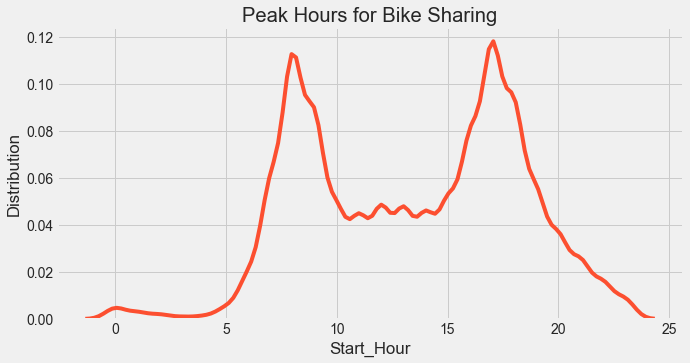

In [26]:
plt.figure(figsize=[10,5])
x_y_t('Working Hours','Distribution','Peak Hours for Bike Sharing')
sns.distplot(Data_Clean['Start_Hour'], hist=False, color=colour)

#### The peak hours of the ride sharing service appears to be around 17:00 hours and 8:00 hours of the day which are 5pm and 8am respectively.

### 2. What is the average duration of rides taken (in minutes)?

(array([3.8400e+02, 8.6600e+02, 1.7290e+03, 3.4740e+03, 6.3760e+03,
        1.0191e+04, 1.5147e+04, 1.9519e+04, 2.2586e+04, 2.4039e+04,
        2.2977e+04, 1.8743e+04, 1.2736e+04, 7.1220e+03, 3.7760e+03,
        2.1890e+03, 1.1850e+03, 6.2500e+02, 3.4800e+02, 2.3700e+02,
        1.9700e+02, 1.2600e+02, 8.0000e+01, 6.9000e+01, 4.9000e+01,
        3.6000e+01, 2.1000e+01, 3.1000e+01, 2.5000e+01, 2.9000e+01,
        3.3000e+01, 7.0000e+00]),
 array([1.00000000e+00, 1.25892541e+00, 1.58489319e+00, 1.99526231e+00,
        2.51188643e+00, 3.16227766e+00, 3.98107171e+00, 5.01187234e+00,
        6.30957344e+00, 7.94328235e+00, 1.00000000e+01, 1.25892541e+01,
        1.58489319e+01, 1.99526231e+01, 2.51188643e+01, 3.16227766e+01,
        3.98107171e+01, 5.01187234e+01, 6.30957344e+01, 7.94328235e+01,
        1.00000000e+02, 1.25892541e+02, 1.58489319e+02, 1.99526231e+02,
        2.51188643e+02, 3.16227766e+02, 3.98107171e+02, 5.01187234e+02,
        6.30957344e+02, 7.94328235e+02, 1.00000000e+03

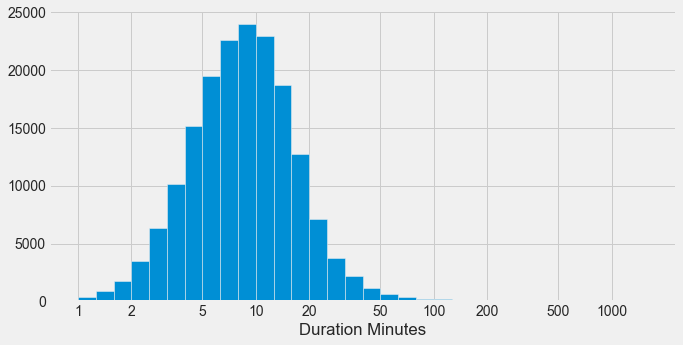

In [27]:
# plot a histogram 
plt.figure(figsize=[10,5])
bin_edges = 10 ** np.arange(0.0, np.log10(Data_Clean.Duration_Minutes.max())+0.1, 0.1)
plt.xscale('log')
tick_locs = [1, 2, 5, 10, 20, 50, 100, 200, 500, 1000]
plt.xticks(tick_locs, tick_locs)
plt.xlabel('Duration Minutes')
plt.hist(data = Data_Clean, x = 'Duration_Minutes', bins = bin_edges)

#### The average duration of rides is between 8 - 10 minutes

### 3. What day of the week has the highest frequencies of rides booked?

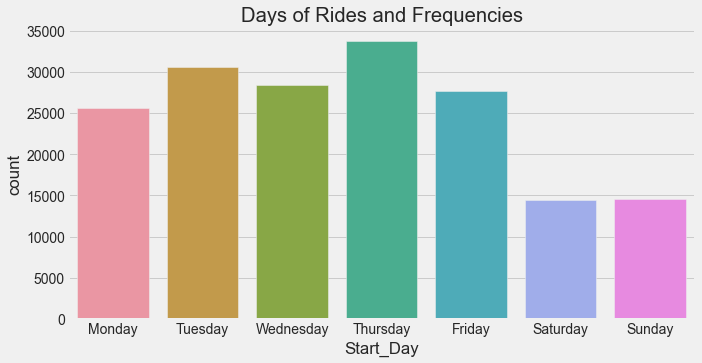

In [28]:
plt.figure(figsize=[10,5])
x_y_t('Days of the Week','Frequencies','Days of Rides and Frequencies')
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
sns.countplot(x='Start_Day', data = Data_Clean, order = day_order)

#### From our Data, Thursdays appear to have the highest frequency of rides taken

### 4.  Who takes the most rides of the three genders highlighted?

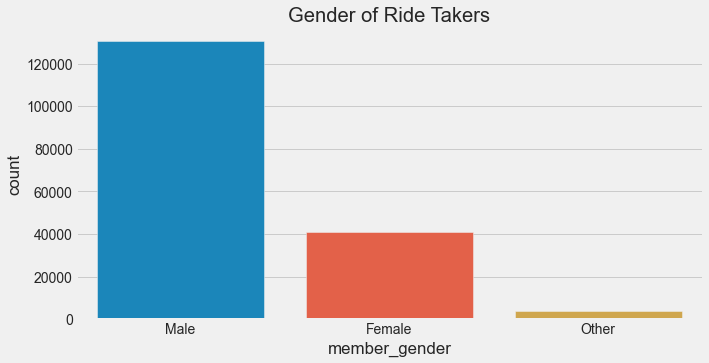

In [29]:
plt.figure(figsize=[10,5])
x_y_t('Gender','Frequencies','Gender of Ride Takers')
gender_order = ["Male", "Female", "Other"]
sns.countplot(x='member_gender', data = Data_Clean, order = gender_order)

([<matplotlib.patches.Wedge at 0x10e7b538>,
 [Text(-0.8375795042612981, 0.8593372877057053, 'Male'),
  Text(0.7795473161548458, -0.9123080520722028, 'Female'),
  Text(1.1974276490631655, -0.07853040977265324, 'Other')],
 [Text(-0.4885880441524239, 0.5012800844949947, '74.6%'),
  Text(0.45473593442366, -0.5321796970421182, '23.3%'),
  Text(0.6984994619535132, -0.04580940570071439, '2.1%')])

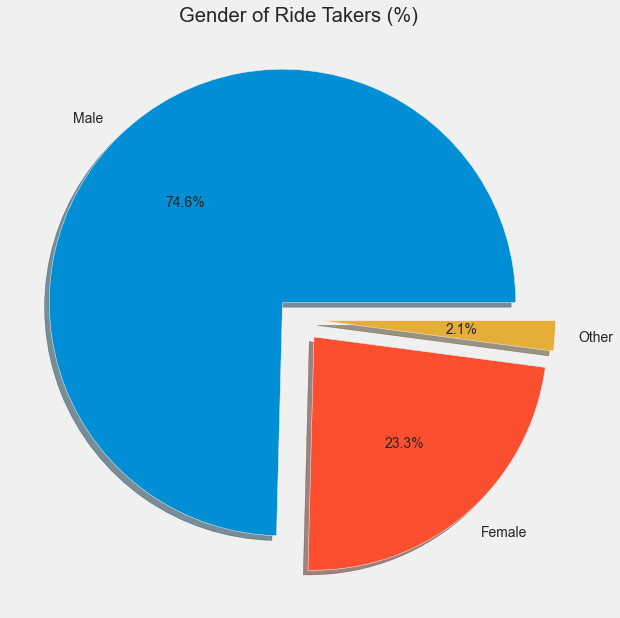

In [30]:
plt.figure(figsize=[10,10])
plt.title('Gender of Ride Takers (%)')
sample=Data_Clean['member_gender'].value_counts()
explodepie = [0.1, 0.1,0.1]
plt.pie(sample, labels = sample.index, autopct='%1.1f%%', explode=explodepie, shadow=True)

#### Almost 75% of those taking rides are Males

### 5. What is the age distribution of those taking the rides and who takes it the most?

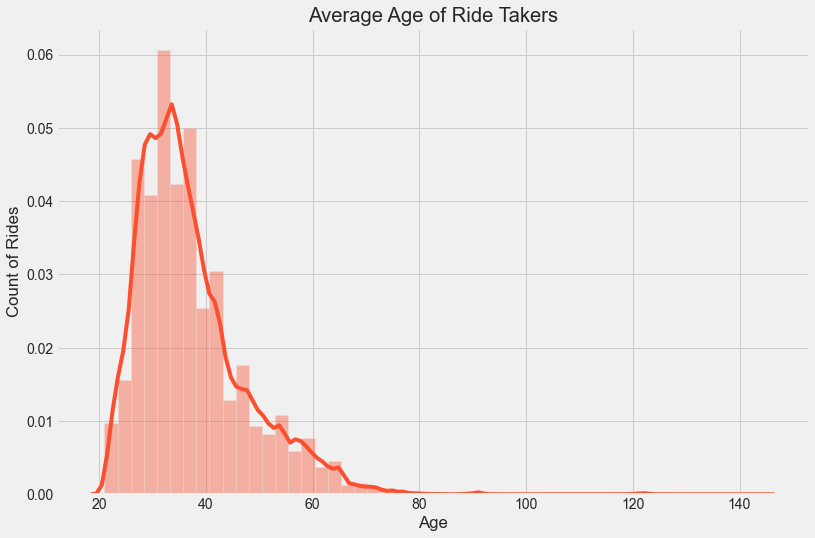

In [31]:
plt.figure(figsize=[12,8])
plt.title('Average Age of Ride Takers')
plt.xlabel('Age of Ride Takers (years)')
plt.ylabel('Count of Rides')
sns.distplot(Data_Clean['Age'], hist=True, color=colour)

#### The Data shows that most of the people who take the ride are at least between Ages 30 - 40 while a larger percentage are around ages 30 - 33 years

### 6. Who are those who make use of the service the most between subscribers and Customer?

([<matplotlib.patches.Wedge at 0x107a8250>,
 [Text(-1.1472960004002337, 0.35172700701769705, 'Subscriber'),
  Text(1.1472959921674686, -0.3517270338720983, 'Customer')],
 [Text(-0.6692560002334695, 0.20517408742698995, '90.5%'),
  Text(0.6692559954310232, -0.2051741030920573, '9.5%')])

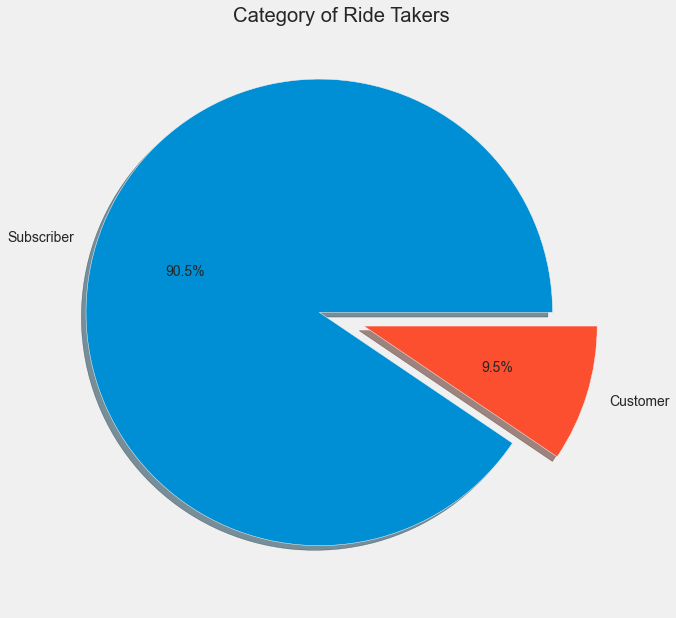

In [32]:
plt.figure(figsize=[10,10])
plt.title('Category of Ride Takers')
sample=Data_Clean['user_type'].value_counts()
explodepie = [0.1, 0.1]
plt.pie(sample, labels = sample.index, autopct='%1.1f%%', explode=explodepie, shadow=True)

#### The subscribers form about 90% of those who use the ride service.

### 7. How many people use the bike sharing service of the company?

([<matplotlib.patches.Wedge at 0x107a8640>,
 [Text(-1.1422572053069588, 0.36776144023583573, 'No'),
  Text(1.1422571966988806, -0.3677614669722955, 'Yes')],
 [Text(-0.666316703095726, 0.21452750680423752, '90.1%'),
  Text(0.666316698074347, -0.2145275224005057, '9.9%')])

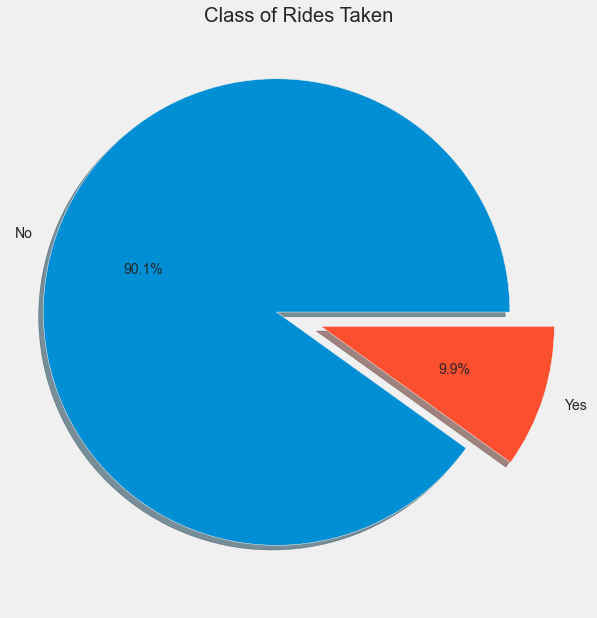

In [33]:
plt.figure(figsize=[10,10])
plt.title('Class of Rides Taken')
sample=Data_Clean['bike_share_for_all_trip'].value_counts()
explodepie = [0.1, 0.1]
plt.pie(sample, labels = sample.index, autopct='%1.1f%%', explode=explodepie, shadow=True)

#### Very few people, less than 10%, use the bike sharing service of the rides.

### 8. Which start and end stations have the highest traffic of the riders and customers?

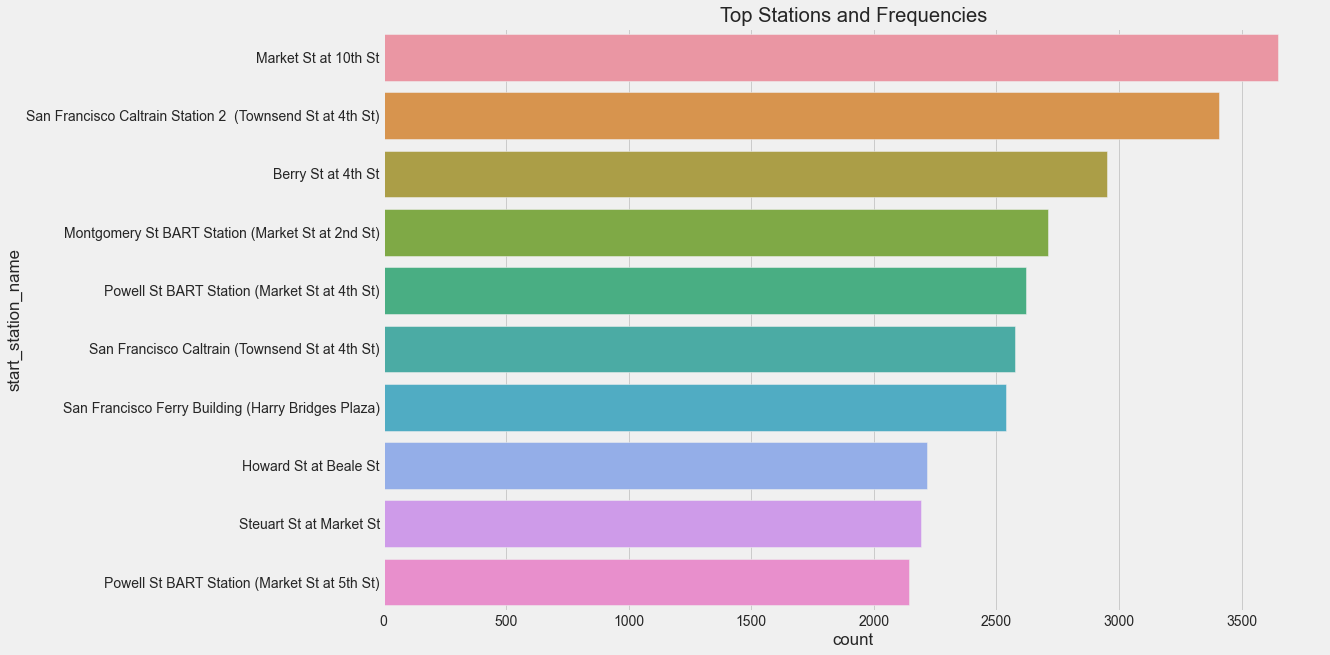

In [34]:
# plot a horizontal bar chart
cat_order = Data_Clean['start_station_name'].value_counts().index[:10]
plt.figure(figsize=[15, 10])
plt.title('Top Stations and Frequencies')
plt.ylabel('Station Names')
plt.xlabel('Frequencies')
sns.countplot(data = Data_Clean, y = 'start_station_name', order = cat_order)

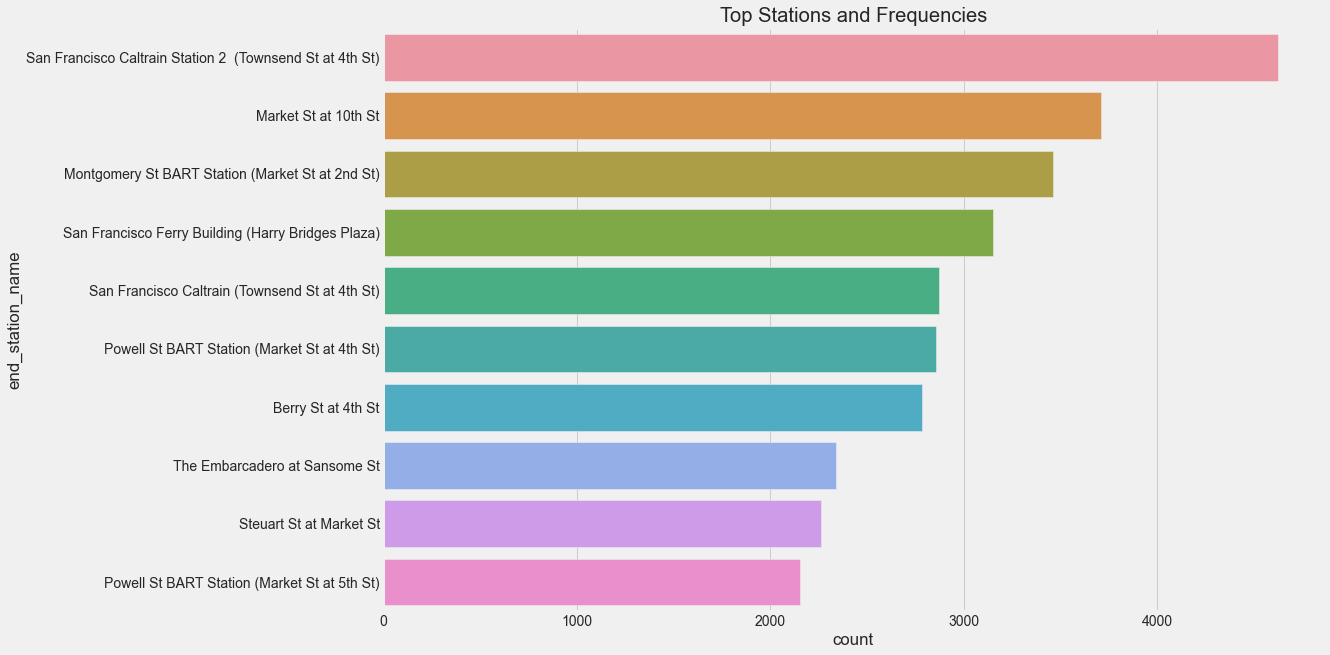

In [35]:
# plot a horizontal bar chart
cat_order = Data_Clean['end_station_name'].value_counts().index[:10]
plt.figure(figsize=[15, 10])
plt.title('Top Stations and Frequencies')
plt.ylabel('Station Names')
plt.xlabel('Frequencies')
sns.countplot(data = Data_Clean, y = 'end_station_name', order = cat_order)

#### The San Francisco Caltrain Station 2 and The Market Station have the highest frequencies of rides booked.

### Distribution(s) of your variable(s) of interest. and Transformations?

#### 1. The Start Hour distribution was bimodal with 2 peaks at 8am and 5pm
#### 2. The Age feature is fairly evenly distributed and unimodal for ages between 30 - 33 years.
#### 3. The Gender feature has a larger percentage being male
#### 4. The Duration feature had lots of points with low values so a logarithmic transformation had to be done with the average ride lasting 8 - 10 minutes.

### Unusual distributions and Operations on the Data.

#### 1. Several columns were dropped because they weren't necessary to aid the visualization, such as start_station and end_station IDs are not needed as well as the latitudes and longitudes as well as rows of missing data.

#### 2. New columns were also created to aid derivation of better insights from the dataset such as; Start_Day, Start Hour, Age and Duration Minutes.

### Bivariate Exploration

### 9. What days had the longest duration of rides? Does the frequency tally with the duration?

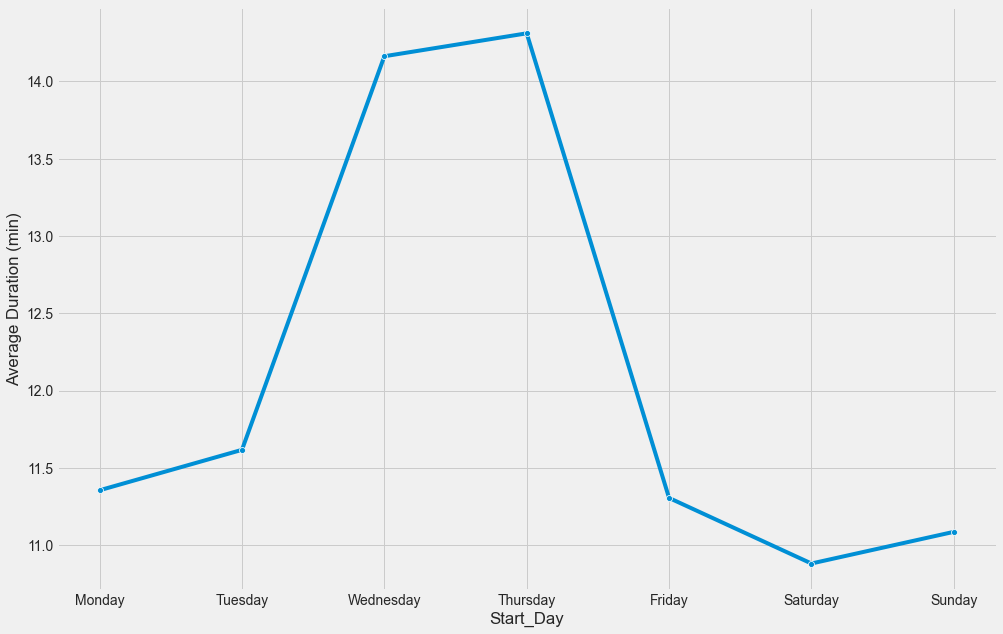

In [36]:
month_avg_mint = Data_Clean.groupby('Start_Day').Duration_Minutes.mean()

# plotting a line plot
plt.figure(figsize=[15,10])
sns.lineplot(x=month_avg_mint.index, y=month_avg_mint, marker='o')
plt.xticks(np.arange(0,7), day_order)
plt.ylabel('Average Duration (min)');

#### The plot shows the longest rides to still be between Thursday to Friday

### 10. On what do we have the highest number of nuique bikes used? Does frequency of rides also increase the number of bikes to be used?

Text(0, 0.5, 'Total Number of Unique Bikes')

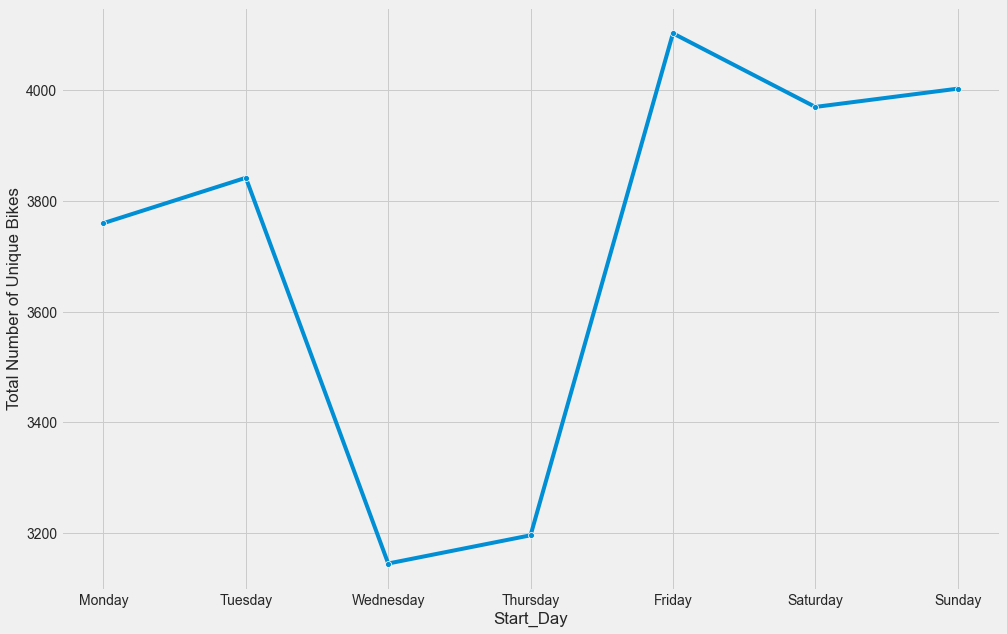

In [37]:
number_of_bikes = Data_Clean.groupby('Start_Day').bike_id.nunique()

# plot a line plot
plt.figure(figsize=[15,10])
sns.lineplot(x=number_of_bikes.index, y=number_of_bikes, marker='o')
plt.xticks(np.arange(0,7), day_order)
plt.ylabel('Total Number of Unique Bikes')

#### The lineplot shows the highest number of unique bikes used to still be between Thursday to Friday.

### 11. What ages were those who rode the longest? Was age a factor to duration of ride?

[Text(0, 0.5, 'Duration'), Text(0.5, 0, 'Age')]

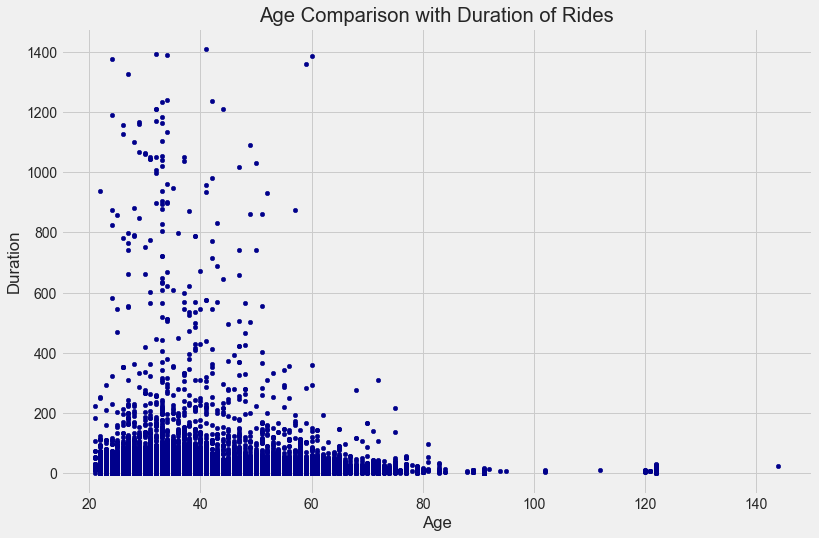

In [38]:
# plotting a scatter plot comparing age with duration of rides taken

ax = Data_Clean.plot.scatter(x='Age', y='Duration_Minutes', c='DarkBlue', figsize=(12,8), title='Age Comparison with Duration of Rides')
ax.set(xlabel='Age', ylabel='Duration')

#### The scatter plot shows that fewer people above 80 years of age rode for long 

### 12. Is there any notable difference in the time usage of the ride service between customers and subscribers?

([<matplotlib.axis.XTick at 0xa041cb8>,
 <a list of 24 Text major ticklabel objects>)

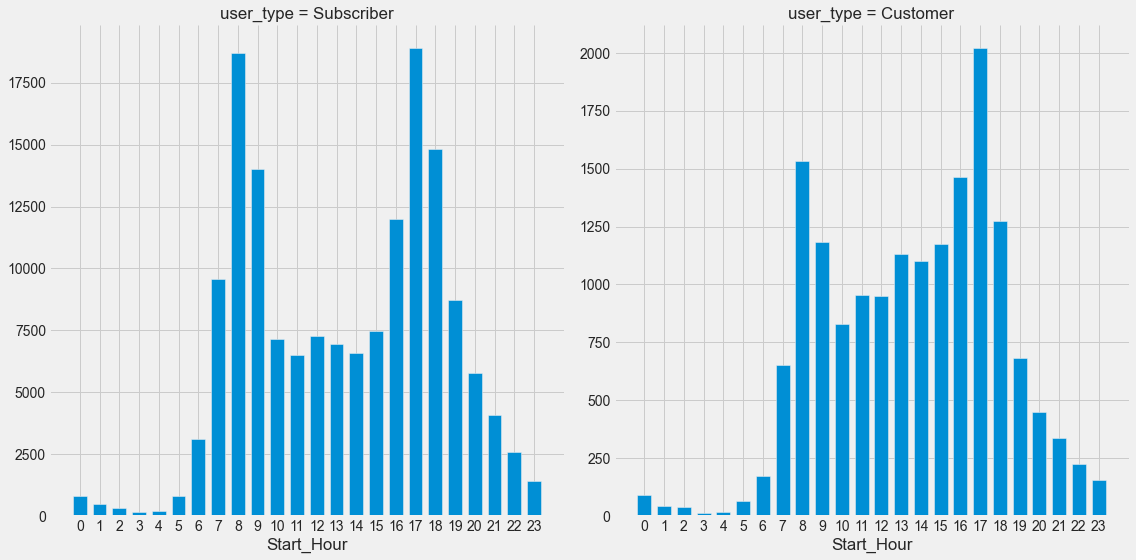

In [39]:
# facetting histograms of start_hour against user_type
bin_edges = np.arange(-0.5, 23.5+1, 1)
user_cat_order = Data_Clean['user_type'].value_counts().index
to_map = sns.FacetGrid(data = Data_Clean, col = 'user_type', height=8, aspect=1, col_order = user_cat_order, sharey=False)
to_map.map(plt.hist, 'Start_Hour', bins = bin_edges, rwidth = 0.7);
plt.xticks(np.arange(0, 23+1, 1))

#### Most subscribers take more rides around 8am as well as 5pm while the Customers mostly use the rides around 5pm

### 13. Did Customers ride longer than subscibers within the entire dataset?

user_type
Customer       6031.202500
Subscriber    28181.766389
Name: Duration_Minutes, dtype: float64


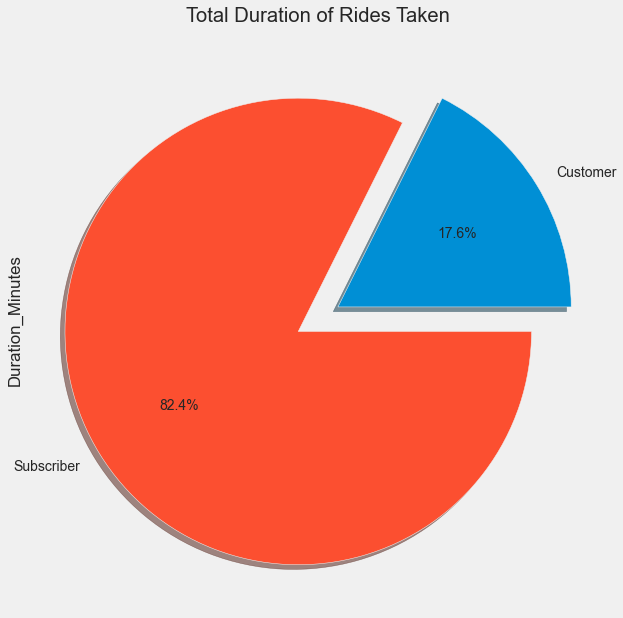

In [40]:
print(Data_Clean.groupby('user_type')['Duration_Minutes'].sum()/60)
plt.figure(figsize=[10,10])

plt.title('Total Duration of Rides Taken')
explodepie = [0.1, 0.1]
Data_Clean.groupby('user_type')['Duration_Minutes'].sum().plot(kind='pie', explode=explodepie, autopct='%1.1f%%', shadow=True)

#### This chart above shows that the suscribers rode longer in total far more than the customers

### 14. Is there any tangible correlation between the Day of the Week and the duration of rides?

([<matplotlib.axis.XTick at 0xa08acd0>,
 [Text(0, 0, 'Monday'),
  Text(1, 0, 'Tuesday'),
  Text(2, 0, 'Wednesday'),
  Text(3, 0, 'Thursday'),
  Text(4, 0, 'Friday'),
  Text(5, 0, 'Saturday'),
  Text(6, 0, 'Sunday')])

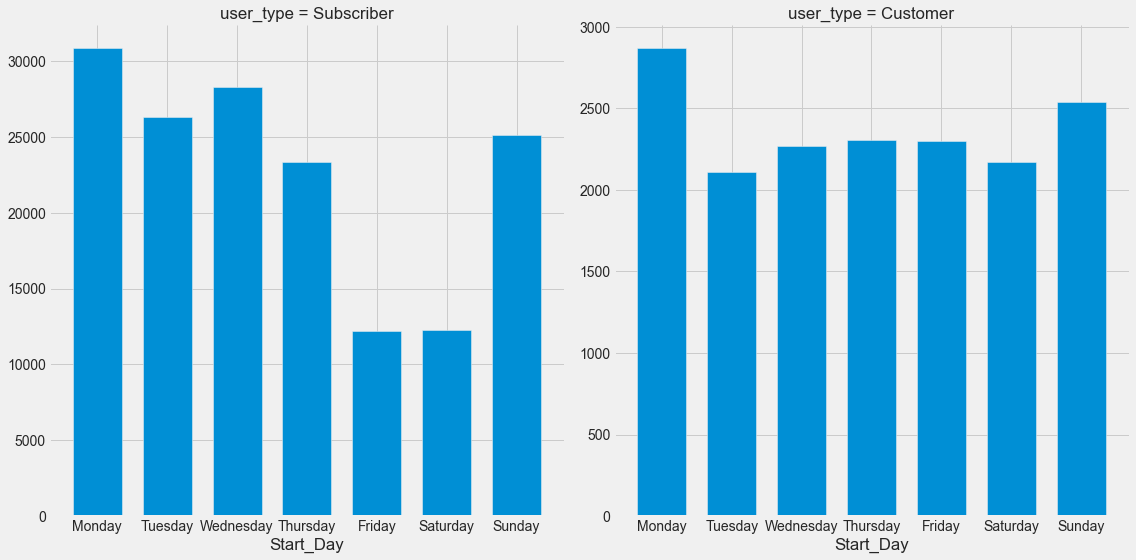

In [41]:
# facetting histograms of start_weekday against user_type
bin_edges = np.arange(-0.5, 6.5+1, 1)
g = sns.FacetGrid(data = Data_Clean, col = 'user_type', height=8, aspect=1, 
                 col_order = user_cat_order, sharey=False)
g.map(plt.hist, 'Start_Day', bins = bin_edges, rwidth = 0.7);
plt.xticks(np.arange(0, 6+1, 1), day_order)

#### Both Subscribers and customers rode longest on Mondays which could be because it's the beginning of the work week

### 16. Is there any difference in duration of rides among the genders represented?

([<matplotlib.axis.XTick at 0xe75fa18>,
 [Text(0, 0, 'Monday'),
  Text(1, 0, 'Tuesday'),
  Text(2, 0, 'Wednesday'),
  Text(3, 0, 'Thursday'),
  Text(4, 0, 'Friday'),
  Text(5, 0, 'Saturday'),
  Text(6, 0, 'Sunday')])

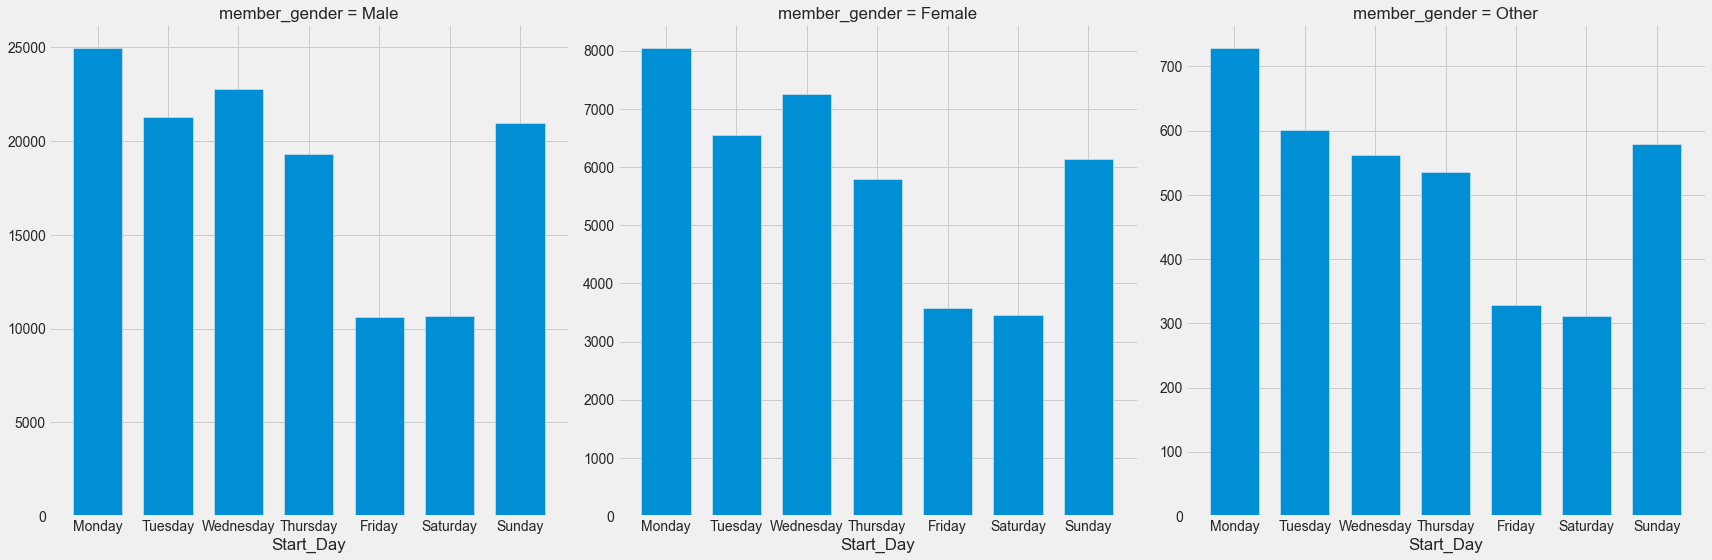

In [42]:
# facetting histograms of start_weekday against user_type
gender_cat_order = Data_Clean['member_gender'].value_counts().index
bin_edges = np.arange(-0.5, 6.5+1, 1)
g = sns.FacetGrid(data = Data_Clean, col = 'member_gender', height=8, aspect=1, 
                 col_order = gender_cat_order, sharey=False)
g.map(plt.hist, 'Start_Day', bins = bin_edges, rwidth = 0.7);
plt.xticks(np.arange(0, 6+1, 1), day_order)

#### While there were minor differences in the duration across different dates, they were quite negligible and most used the service on Mondays

### Relationships between Main Features

#### There is a negative correaltion between the Age of users and the duration of their rides, the durations seemingly reduced with age especially above 80 Years of Age.

#### There is no tangible difference between the Duration of rides and the Genders of users.

### Relationships between Other Features

#### There is no tangible difference between the Duration of rides and the Days of the Week as well as Number of Unique Bikes used, they all have a consistent increase between Thursdays and Fridays.

#### There is a slight difference between The peak hours of the Users (Customers: 5pm and Subscribers: 8am and 5pm)

#### The Subscribers rode longer in total than Customers while both rode equally more on Mondays.

### Multivariate Exploration

### 17. Is there any relationship between the Users' Durations across Different Days of the Week?

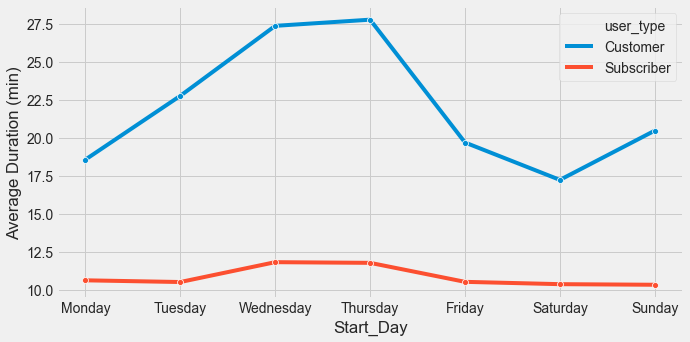

In [43]:
user_month_avg_mint = Data_Clean.groupby(['user_type','Start_Day']).Duration_Minutes.mean()
user_month_avg_mint = user_month_avg_mint.reset_index()

# plot a line plot with colors based on user_type
plt.figure(figsize=[10,5])
sns.lineplot(data = user_month_avg_mint, x='Start_Day', y='Duration_Minutes', hue='user_type', marker='o')
plt.xticks(np.arange(0,7), day_order)
plt.ylabel('Average Duration (min)');

#### Just as previously observed, Thursdays appear to be record the longest duration of rides

### 18. Is there any relationship between the genders and the duration of rides across the days of the week?

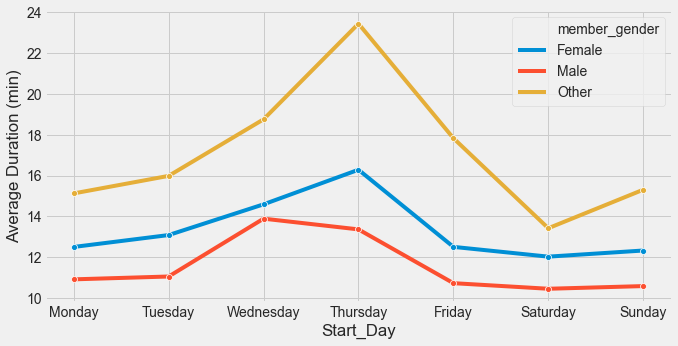

In [44]:
user_gender = Data_Clean.groupby(['member_gender','Start_Day']).Duration_Minutes.mean()
user_gender = user_gender.reset_index()

# plot a line plot with colors based on user_type
plt.figure(figsize=[10,5])
sns.lineplot(data = user_gender, x='Start_Day', y='Duration_Minutes', hue='member_gender', marker='o')
plt.xticks(np.arange(0,7), day_order)
plt.ylabel('Average Duration (min)');

#### While the Females and other unidentified genders have the longest rides on Thursdays, Males mostly rode the longest on Wednesdays.

### Relationships Observed

#### The relationships uncovered in the section simply solidified what had been observed from the previous sections with the exception of the second which showed the longest rides for Males varying slightly from the other genders represented.


### Conclusions

#### 1. The peak hours of the ride sharing service are around 17:00 hours and 8:00 hours of the day which are 5pm and 8am respectively. These coincide with the resumption and closing hours for most jobs which could indicate why there are increased bookings during those periods.

#### 2. The average duration of rides is between 8 - 10 minutes

#### 3. Thursdays appear to have the highest frequency of rides taken. This also appears explain why there were more unique bikes used between Thursdays to Fridays.
#### However, in terms of segmented assessment of gender against the duration of ride taken, it appears to be longest on Mondays which could be because it's the beginning of the work week.

#### 4. Almost 75% of those taking rides are Males, perhaps because Males find it more convenient to take bikes compared to females.

#### 5. Most of the people who take the rides are at least between the Ages 30 - 40 while a larger percentage are around ages 30 - 33 years. The duration of rides also begins to reduce with especially after 80 Years of Age.

#### 6. The subscribers form about 90% of those who use the ride service and also rode rode longer in total, far more than the customers. This makes sense since it would be more economical to subscribe if the customer would require the service frequently.

#### 7. The San Francisco Caltrain Station 2 and The Market Station have the highest frequencies of rides booked, this could probably be that these stations were within the central areas of residence and work.

#### 8. Very few people, less than 10%, use the bike sharing service of the rides.